# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [317]:
# your code here
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [318]:
df = pd.read_csv('/content/tic-tac-toe.csv')
df

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False


In [319]:
# convert categorical columns (x,o) into numerical (1,0)
df = df.replace({'x': 1, 'o': 0, 'b': 2})

# conver boolean into 0 and 1
df['class'] = df['class'].astype(int)

<ipython-input-319-46b3370b88bc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'x': 1, 'o': 0, 'b': 2})


In [320]:
df.dtypes

,0
TL,int64
TM,int64
TR,int64
ML,int64
MM,int64
MR,int64
BL,int64
BM,int64
BR,int64
class,int64


In [321]:
df['TM'].value_counts()

,count
TM,
1,378
0,330
2,250


In [322]:
# Separate the inputs and output.
X = df.drop('class', axis=1)
y = df['class']

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [323]:
from sklearn.model_selection import train_test_split

# Split the training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
X_train

,TL,TM,TR,ML,MM,MR,BL,BM,BR
302,0,1,1,0,1,0,2,1,2
467,0,2,0,0,1,2,1,1,1
294,1,2,2,2,1,2,0,0,1
548,2,0,1,0,2,1,2,2,1
465,0,2,0,1,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...
106,1,1,2,0,1,0,0,2,1
270,1,2,0,2,1,0,0,1,1
860,0,2,1,0,1,2,0,2,1
435,0,2,1,0,1,0,1,2,1


In [325]:
# Create a Sequential model.
from tensorflow.keras.layers import Dense, Dropout

tf.keras.utils.set_random_seed(50)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(9,)))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,210 (28.16 KB)

 Trainable params: 7,210 (28.16 KB)

 Non-trainable params: 0 (0.00 B)

In [326]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)

In [327]:
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [328]:
y_train

,class
302,1
467,1
294,1
548,1
465,1
...,...
106,1
270,1
860,0
435,1


In [329]:
# Fit the training data.
history = model.fit(X_train, y_train,
                    batch_size=35,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5428 - loss: 1.2248 - val_accuracy: 0.6510 - val_loss: 0.6213
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6524 - loss: 0.6526 - val_accuracy: 0.6771 - val_loss: 0.5668
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6881 - loss: 0.5792 - val_accuracy: 0.6719 - val_loss: 0.5006
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7293 - loss: 0.5380 - val_accuracy: 0.7396 - val_loss: 0.4411
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7777 - loss: 0.4734 - val_accuracy: 0.7656 - val_loss: 0.4275
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7942 - loss: 0.4389 - val_accuracy: 0.8698 - val_loss: 0.3354
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8424 - loss: 0.3662 - val_accuracy: 0.8490 - val_loss: 0.3142
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8685 - loss: 0.3271 - val_accuracy: 0.9115 - val_loss

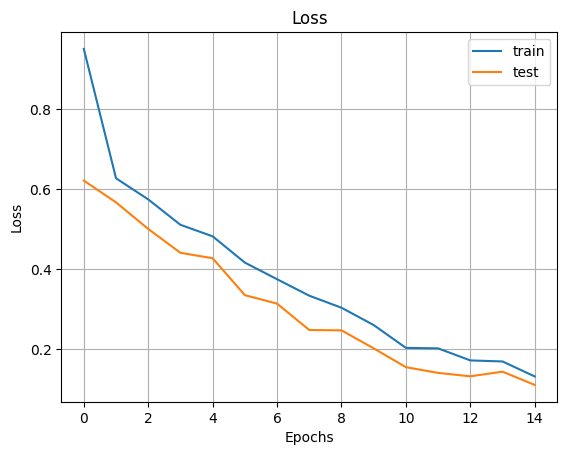

In [330]:
# plot the loss vs epochs
import matplotlib.pylab as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True);

In [331]:
# Evaluate the neural network model with the test data.

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11134117096662521
Test accuracy: 0.9635416865348816


In [332]:
#Save the model as tic-tac-toe.model
model.save('tic-tac-toe.keras')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [333]:
# your code here
new_model = tf.keras.models.load_model('tic-tac-toe.keras')

In [334]:
predictions = new_model.predict([X_test])
predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[9.9998325e-01, 1.6631757e-05, 3.7281472e-10, ..., 3.0124601e-11,
        2.1378099e-10, 2.6845107e-10],
       [5.9710937e-03, 9.9402893e-01, 8.1754326e-11, ..., 5.1481393e-12,
        1.6499337e-10, 2.9953796e-11],
       [6.6470422e-02, 9.3351656e-01, 2.2671245e-06, ..., 4.4869657e-07,
        3.1433010e-06, 1.0313522e-06],
       ...,
       [1.4041686e-02, 9.8595828e-01, 8.7027707e-10, ..., 7.1920941e-11,
        1.7022989e-09, 2.4994282e-10],
       [1.6083658e-02, 9.8391628e-01, 3.1175573e-09, ..., 3.0325104e-10,
        5.8604464e-09, 1.0316736e-09],
       [9.9458605e-01, 5.4125469e-03, 2.7433086e-07, ..., 6.0283185e-08,
        2.4756989e-07, 1.9016557e-07]], dtype=float32)

In [335]:
# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare predictions with true labels
correct_predictions = np.sum(predicted_labels == y_test)
total_predictions = len(y_test)

print(f"Correct predictions: {correct_predictions}")
print(f"Total predictions: {total_predictions}")
print(f"Accuracy: {correct_predictions / total_predictions}")

Correct predictions: 185
Total predictions: 192
Accuracy: 0.9635416666666666


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [336]:
# yes, my model achieved low loss (<0.1) and high accuracy (>0.95)

**Which approach(es) did you find helpful to improve your model performance?**

In [337]:
# changing the neuro numbers in density